# **LetsGrowMore**
### Beginner Level Task : Data Science
#### Author: Anshul Chaurasiya
---
MUSIC RECOMMENDATION
###### This can suggest songs to users based on their listening patterns.
Dataset: https://www.kaggle.com/competitions/kkbox-music-recommendation-challenge/data?select=members.csv.7z

In [2]:
#importing the modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data
members=pd.read_csv('members.csv')
songs= pd.read_csv('songs.csv')
train= pd.read_csv('train.csv')

In [4]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [5]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640.0,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328.0,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781.0,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554.0,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329.0,726,貴族精選,Traditional,Traditional,52.0


In [6]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [7]:
#check the basic info of data
train.info()
songs.info()
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70272 entries, 0 to 70271
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   msno                70272 non-null  object 
 1   song_id             70271 non-null  object 
 2   source_system_tab   70064 non-null  object 
 3   source_screen_name  67656 non-null  object 
 4   source_type         70148 non-null  object 
 5   target              70271 non-null  float64
dtypes: float64(1), object(5)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95127 entries, 0 to 95126
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   song_id      95127 non-null  object 
 1   song_length  95126 non-null  float64
 2   genre_ids    93307 non-null  object 
 3   artist_name  95126 non-null  object 
 4   composer     55146 non-null  object 
 5   lyricist     25890 non-null  object 
 6  

In [8]:
train.describe()

,target
count,70271.000000
mean,0.756514
std,0.429189
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
songs.describe()

,song_length,language
count,9.512600e+04,95126.000000
mean,2.465140e+05,26.338992
std,1.294285e+05,23.324270
min,1.253000e+03,-1.000000
25%,1.995538e+05,3.000000
50%,2.337790e+05,24.000000
75%,2.731590e+05,52.000000
max,6.448901e+06,59.000000


In [10]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [11]:
train.shape

(70272, 6)

In [12]:
songs.shape

(95127, 7)

In [13]:
members.shape

(34403, 7)

**Data Visualization**

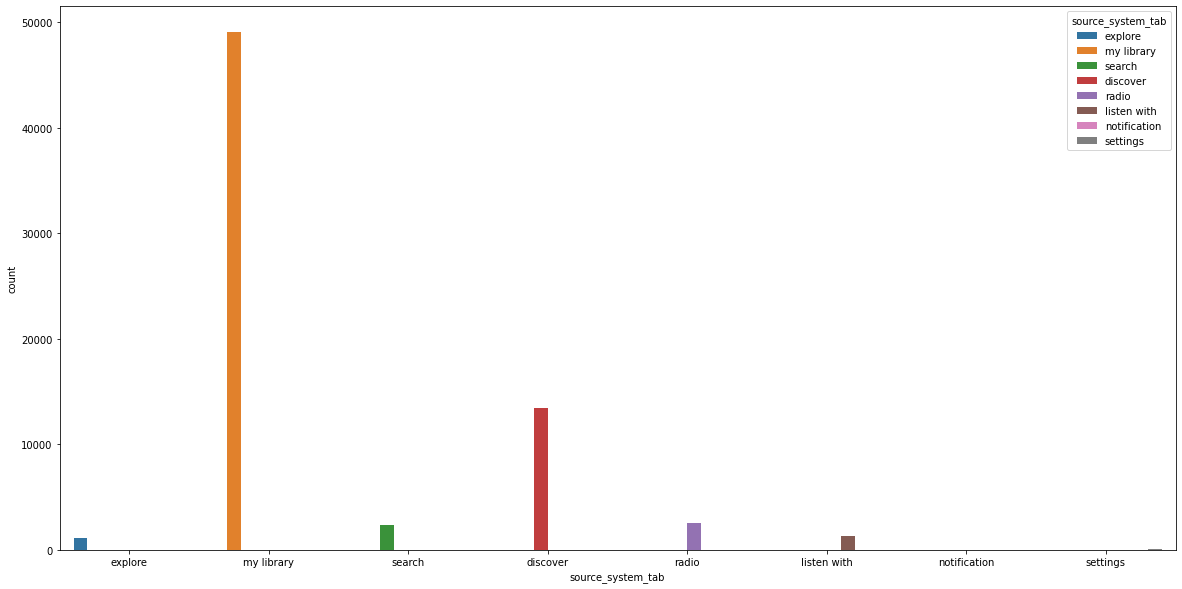

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x='source_system_tab', hue='source_system_tab', data=train)

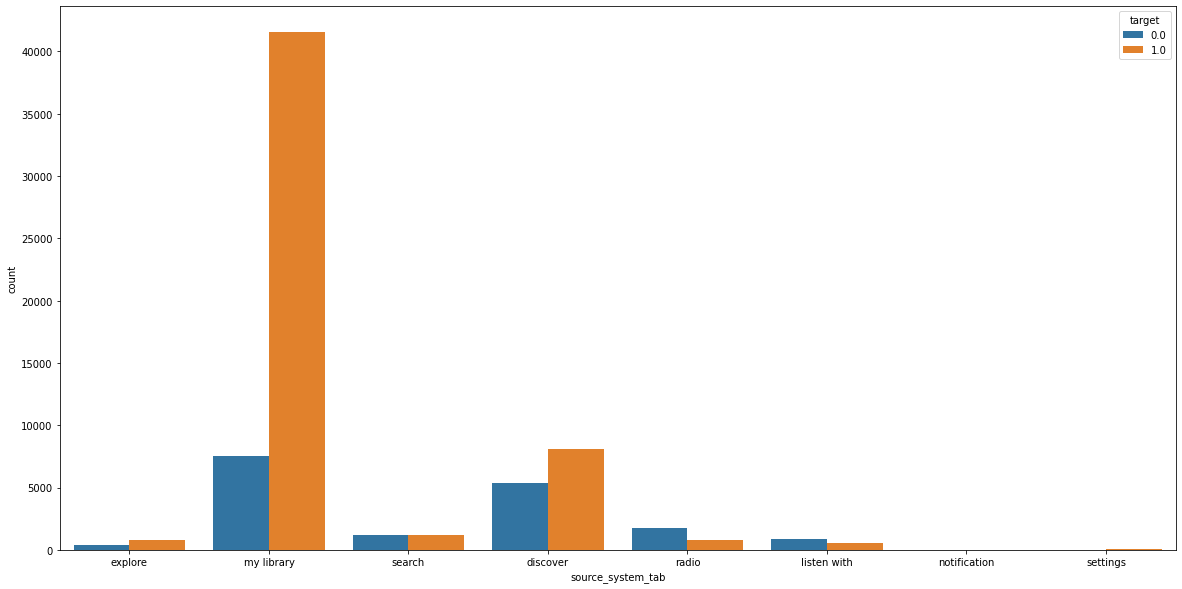

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x='source_system_tab', hue='target', data=train)

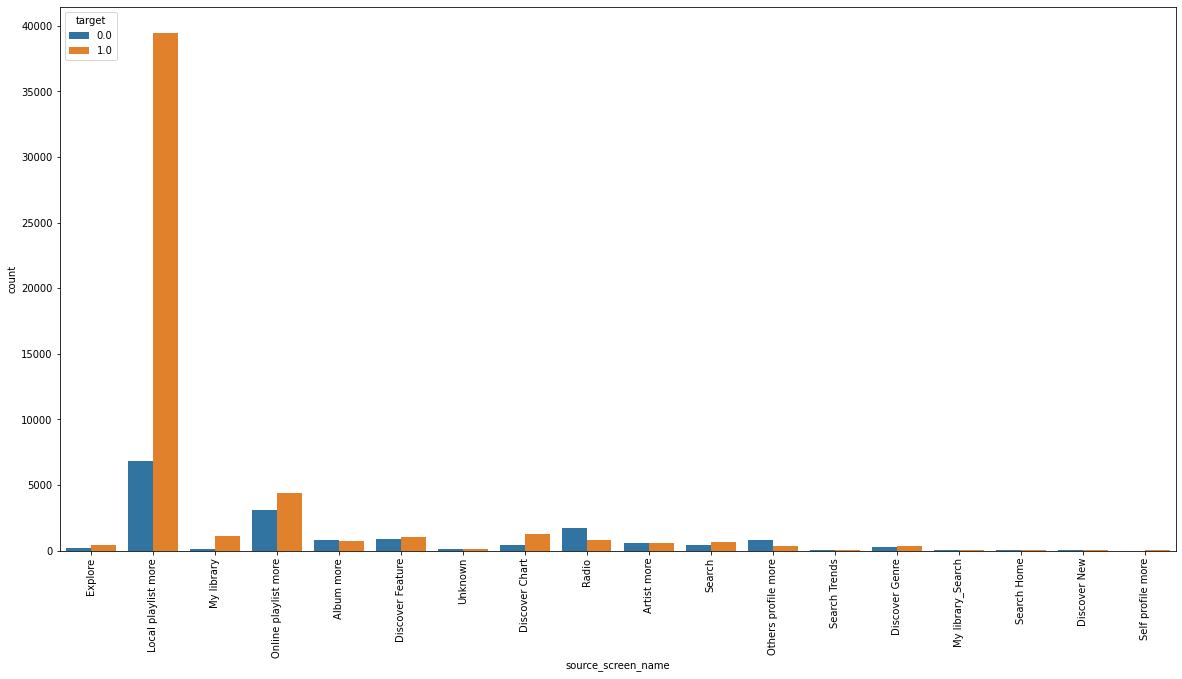

In [16]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='source_screen_name', hue='target', data=train)

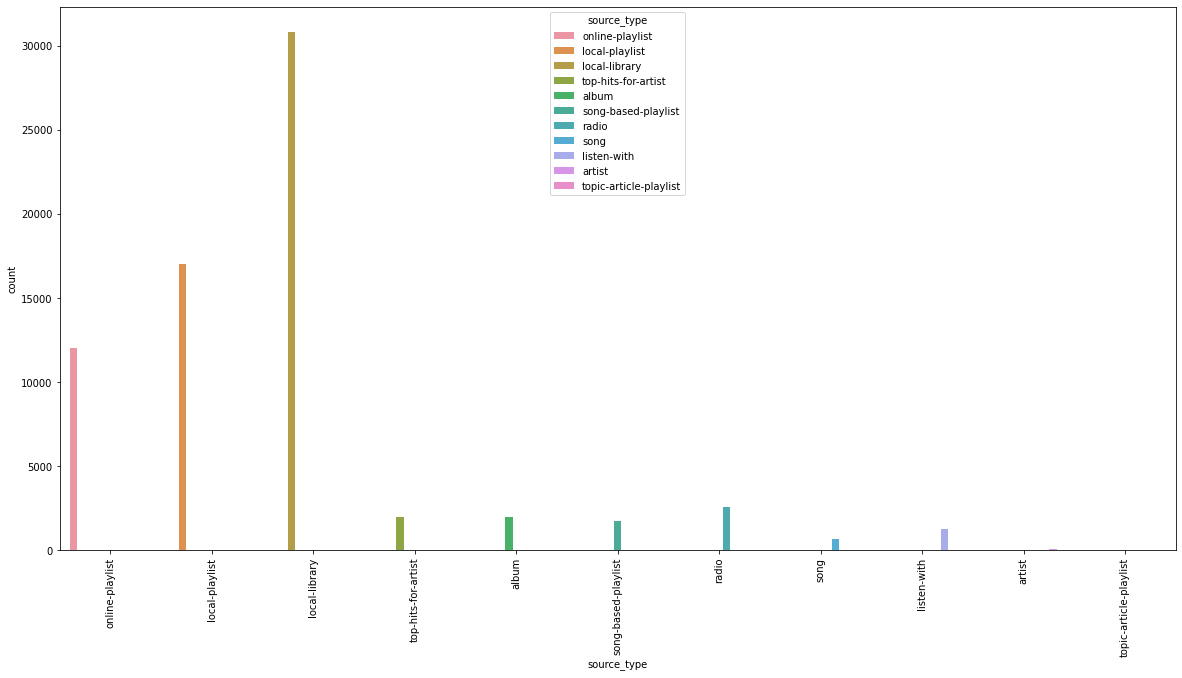

In [17]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='source_type', hue='source_type', data=train)

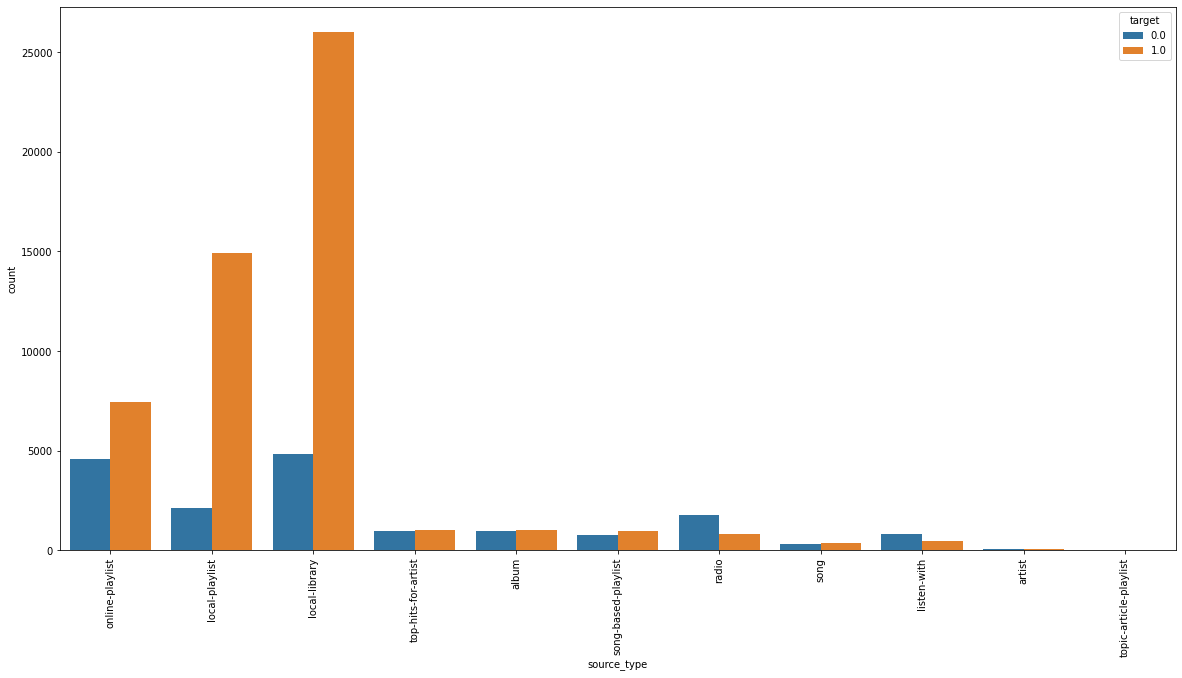

In [18]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='source_type', hue='target', data=train)

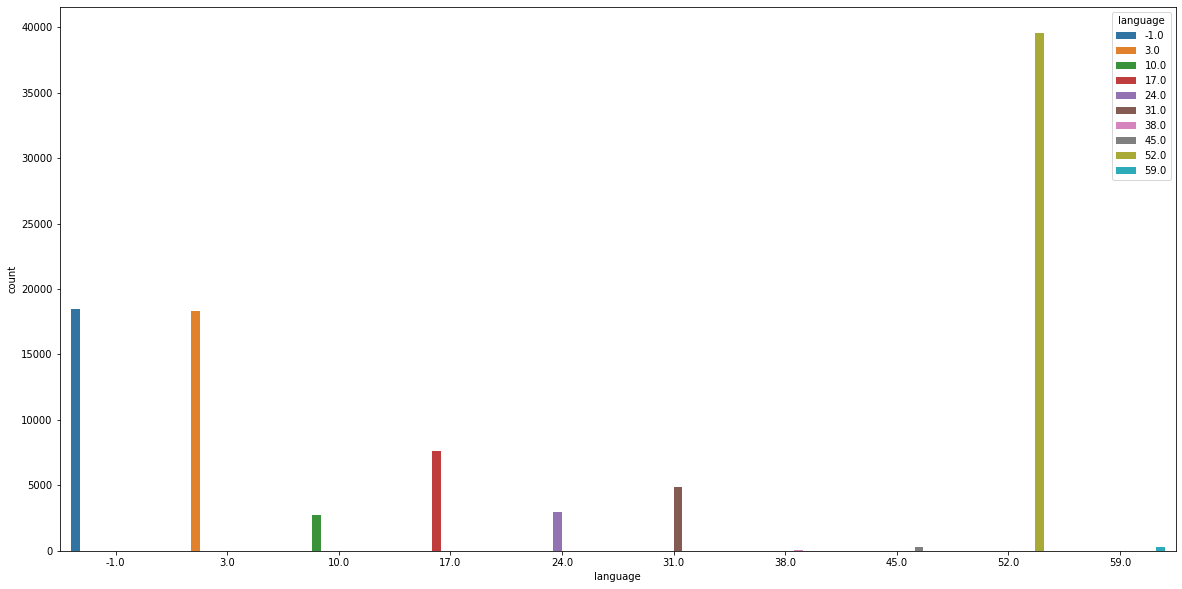

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x='language', hue='language', data=songs)

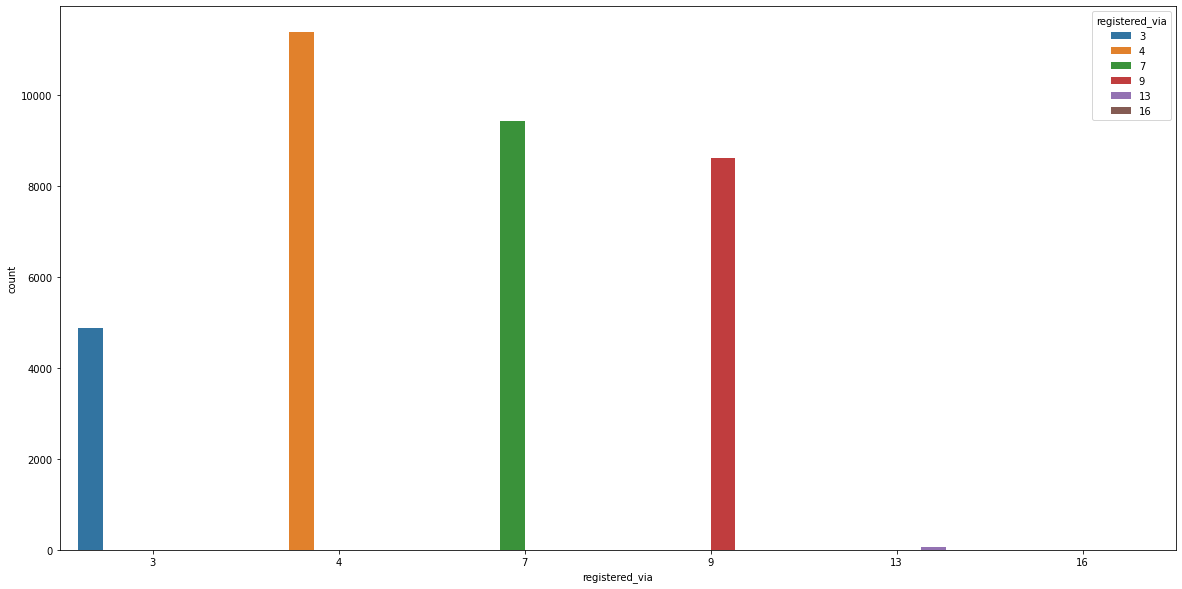

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x='registered_via', hue='registered_via', data=members)

**Data Cleaning**

In [21]:
ntr= 7000
nts= 3000
names=['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'target']
test1= pd.read_csv('train.csv', names=names, skiprows=ntr, nrows=nts)

In [22]:
test= test1.drop(['target'], axis=1)
ytr= np.array(test1['target'])

In [23]:
test_name = ['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type']
test['id']= np.arange(nts)
test= test[test_name]

In [24]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test= test.merge(songs[song_cols], on= 'song_id', how='left')

In [25]:
members['registration_year']= members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month']= members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date']= members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [26]:
members['expiration_year']= members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month']= members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date']= members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [27]:
members_cols= members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [28]:
train= train.fillna(-1)
test = test.fillna(-1)

In [29]:
import gc
del members, songs; gc.collect();

In [30]:
cols = list(train.columns)
cols.remove('target')

In [31]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(cols):
  if train[col].dtype == 'object':
    train[col]= train[col].apply(str)
    test[col]= test[col].apply(str)

    le = LabelEncoder()
    train_vals = list(train[col].unique())
    test_vals = list(test[col].unique())
    le.fit(train_vals + test_vals)
    train[col]= le.transform(train[col])
    test[col]= le.transform(test[col])


100%|██████████| 19/19 [00:00<00:00, 49.61it/s]


In [32]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id':unique_songs, 'popularity':0})
train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted= test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

**Building the Model**

In [33]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X= np.array(train.drop(['target'], axis=1))
y= train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids=test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=12)

del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid)

watchlist = [d_train, d_valid]

In [35]:
def predict(m1_model):
  model= m1_model.fit(X_train, y_train)
  print('Training Score : {}'.format(model.score(X_train, y_train)))
  y_pred = model.predict(X_valid)
  v_test= model.predict(X_test)
  yhat = (v_test>0.5).astype(int)
  comp= (yhat==ytr).astype(int)
  acc= comp.sum()/comp.size*100
  print("Accuracy on test data for the model", acc)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
predict(LogisticRegression())

Training Score : 0.756324710644488
Accuracy on test data for the model 74.9


**Prediction using LightGBM**

In [38]:
params= {}
params['learning_rate']=0.4
params['application']= 'binary'
params['max_depth']=15
params['num_leaves']= 2*8
params['verbosity']=0
params['metric']= 'auc'

model1= lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, early_stopping_rounds=10, verbose_eval=1)

[1]	training's auc: 0.710663	valid_1's auc: 0.699303
Training until validation scores don't improve for 10 rounds.
[2]	training's auc: 0.716639	valid_1's auc: 0.70593
[3]	training's auc: 0.741597	valid_1's auc: 0.731593
[4]	training's auc: 0.752297	valid_1's auc: 0.740767
[5]	training's auc: 0.755362	valid_1's auc: 0.742918
[6]	training's auc: 0.764236	valid_1's auc: 0.754283
[7]	training's auc: 0.768196	valid_1's auc: 0.755552
[8]	training's auc: 0.773927	valid_1's auc: 0.761526
[9]	training's auc: 0.777309	valid_1's auc: 0.763148
[10]	training's auc: 0.781869	valid_1's auc: 0.767178
[11]	training's auc: 0.785762	valid_1's auc: 0.769754
[12]	training's auc: 0.787363	valid_1's auc: 0.771426
[13]	training's auc: 0.789188	valid_1's auc: 0.772723
[14]	training's auc: 0.792802	valid_1's auc: 0.776902
[15]	training's auc: 0.795507	valid_1's auc: 0.778787
[16]	training's auc: 0.796805	valid_1's auc: 0.779537
[17]	training's auc: 0.799933	valid_1's auc: 0.781888
[18]	training's auc: 0.802713	

In [39]:
p_test = model1.predict(X_test)

In [40]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 86.466667%
